In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits import mplot3d


sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [94]:
from model import TwoRegionModel

In [96]:
groups = [
    {"delta": 0.35, "rho": 0.70, "T": 1.6 }, 
    {"delta": 0.35, "rho": 0.75, "T": 1.9 }, 
    {"delta": 0.35, "rho": 0.80, "T": 2.2 }, 
    {"delta": 0.40, "rho": 0.70, "T": 1.9 }, 
    {"delta": 0.40, "rho": 0.75, "T": 2.4 }, 
    {"delta": 0.40, "rho": 0.80, "T": 2.2 }, 
    {"delta": 0.45, "rho": 0.70, "T": 1.9 }, 
    {"delta": 0.45, "rho": 0.75, "T": 2.2 }, 
    {"delta": 0.45, "rho": 0.80, "T": 1.9 }, 
    {"delta": 0.45, "rho": 0.70, "T": 2. }
]

for g in groups:
    g["eps"] = 1 / (1-g["rho"])

In [69]:
g = groups[8]

#### Q1



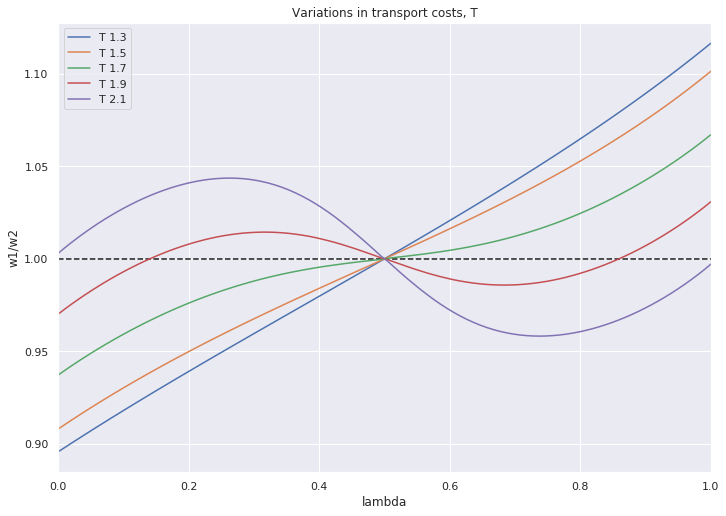

In [70]:
Ts = [1.3, 1.5, 1.7, 1.9, 2.1]

n = 100
lams = np.linspace(0, 1, n)

df = pd.DataFrame(index=lams, columns=[f"T {T}" for T in Ts])

for n, T in enumerate(Ts):
    
    model = TwoRegionModel(delta=g["delta"], eps=g["eps"], verbose=0)
    
    wage_r = []

    for l in lams:

        _, _, _, wages = model.solve(l, T)

        wage_r.append(wages[0] / wages[1])
        
    df[f"T {T}"] = wage_r    

df.plot()
plt.ylabel("w1/w2")
plt.xlabel("lambda")
plt.title("Variations in transport costs, T")
plt.hlines(1, xmin=0, xmax=1, linestyle="--")
plt.xlim(0, 1)
plt.show()

\begin{align}
    T \xrightarrow{+} \textit{relocation} \xrightarrow{+} P(\textit{mixed equilibria})
\end{align}

#### Q2

##### a.

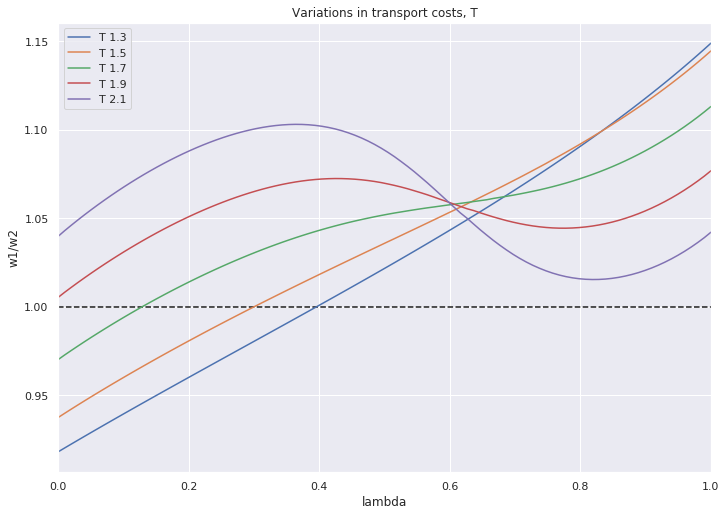

In [71]:
Ts = [1.3, 1.5, 1.7, 1.9, 2.1]

n = 100
lams = np.linspace(0, 1, n)

df = pd.DataFrame(index=lams, columns=[f"T {T}" for T in Ts])

for n, T in enumerate(Ts):
    
    model = TwoRegionModel(delta=g["delta"], eps=g["eps"], phi=.6, verbose=0)
    
    wage_r = []

    for l in lams:

        _, _, _, wages = model.solve(l, T)

        wage_r.append(wages[0] / wages[1])
        
    df[f"T {T}"] = wage_r    

df.plot()
plt.ylabel("w1/w2")
plt.xlabel("lambda")
plt.title("Variations in transport costs, T")
plt.hlines(1, xmin=0, xmax=1, linestyle="--")
plt.xlim(0, 1)
plt.show()

#### b.

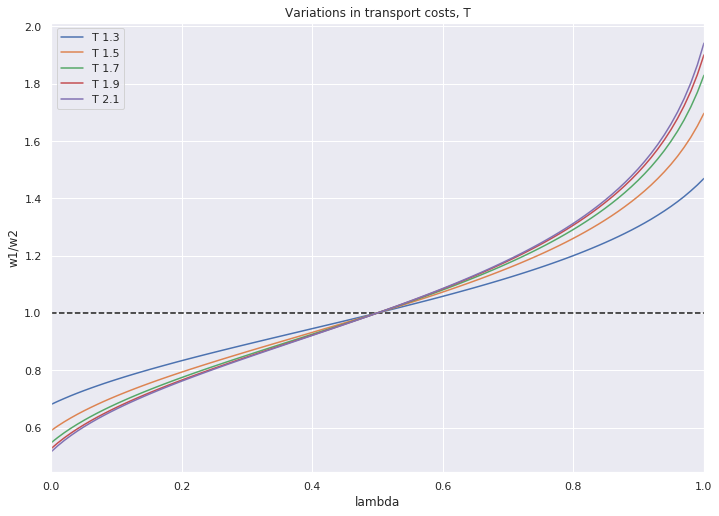

In [72]:
Ts = [1.3, 1.5, 1.7, 1.9, 2.1]

n = 100
lams = np.linspace(0, 1, n)

df = pd.DataFrame(index=lams, columns=[f"T {T}" for T in Ts])

for n, T in enumerate(Ts):
    
    model = TwoRegionModel(delta=0.9, eps=g["eps"], verbose=0)
    
    wage_r = []

    for l in lams:

        _, _, _, wages = model.solve(l, T)

        wage_r.append(wages[0] / wages[1])
        
    df[f"T {T}"] = wage_r    

df.plot()
plt.ylabel("w1/w2")
plt.xlabel("lambda")
plt.title("Variations in transport costs, T")
plt.hlines(1, xmin=0, xmax=1, linestyle="--")
plt.xlim(0, 1)
plt.show()

Demand is more mobile -> workers move and firms move 

#### Q3

In [194]:
def plt_3d(X, Y, Z, title = '', labels = [], one = False):
    
    x_label, y_label, z_label = labels
    ax = plt.axes(projection='3d')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(title)
    ax.plot_surface(X, Y, Z)
    
    if one:
        S = np.ones(Z.shape)
        ax.plot_surface(X, Y, S, alpha=1)
    
    return ax

def plt_countour(X, Y, Z, f= False,
                  title = '', labels = [], levels = np.arange(0, 2.25, 0.25/2)):
    x_label, y_label = labels
    
    fig, ax = plt.subplots()
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    if f:
        cs = ax.contourf(X, Y, Z, levels=levels, cmap="coolwarm")
        fig.colorbar(cs, ax=ax, shrink=0.9)
    else:
        cs = ax.contour(X, Y, Z, levels=levels)
        ax.clabel(cs, inline=1, fontsize=10)
    
    fig.show()

In [171]:
def tomahawk(model, Ts = np.linspace(1, 20, 100)):
    lams = np.linspace(0, 1, 100)
    
    l, t = np.meshgrid(lams, Ts)
    
    @np.vectorize
    def real_wage(l, T):
        sol = model.solve(l, T)
        try:
            wages = sol[3]
        except TypeError:
            breakpoint()
            
        return wages[0]/wages[1]
    
    
    wr = real_wage(l, t)
    
    return l, t, wr
       

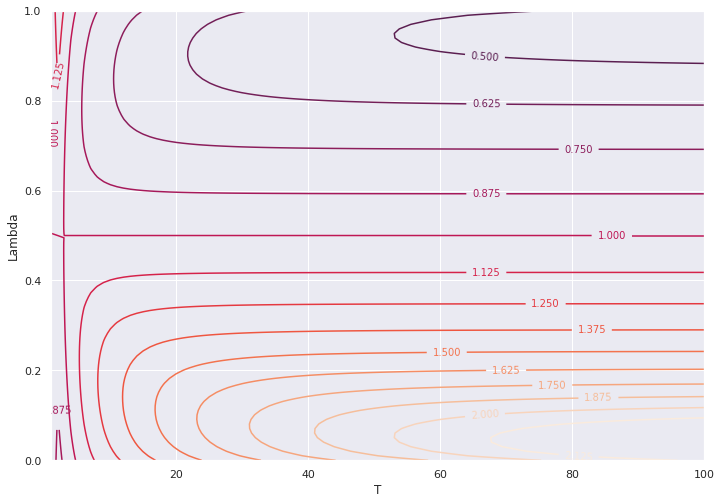

In [174]:
model = TwoRegionModel(delta=g["delta"], eps=g["eps"], phi=0.5, verbose=0)
lam, T, wr = tomahawk(model, Ts = np.linspace(1, 100, 100))
plt_countour(T, lam, wr, labels = ["T", "Lambda"], f=False)

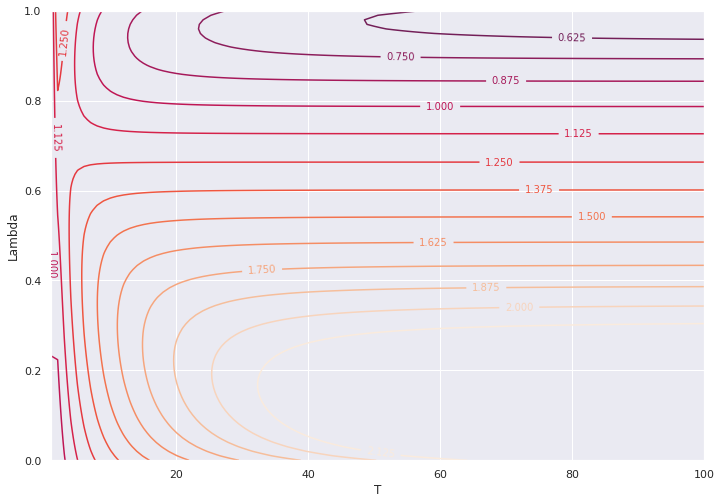

In [175]:
model = TwoRegionModel(delta=g["delta"], eps=g["eps"], phi=0.7, verbose=0)
lam, T, wr = tomahawk(model, Ts = np.linspace(1, 100, 100))
plt_countour(T, lam, wr, labels = ["T", "Lambda"], f=False)

In [192]:
def derivative(model, Ts = np.linspace(1, 20, 100)):
    lams = np.linspace(0, 1, 100)
    
    l, t = np.meshgrid(lams, Ts)
    
    @np.vectorize
    def real_wage(l, T):
        sol = model.solve(l, T)
        wages = sol[3]
        
        if l < 0.5:
            return wages[0]/wages[1]
        else:
            return wages[1]/wages[0]
                
    wr = real_wage(l, t)
    
    return l, t, wr

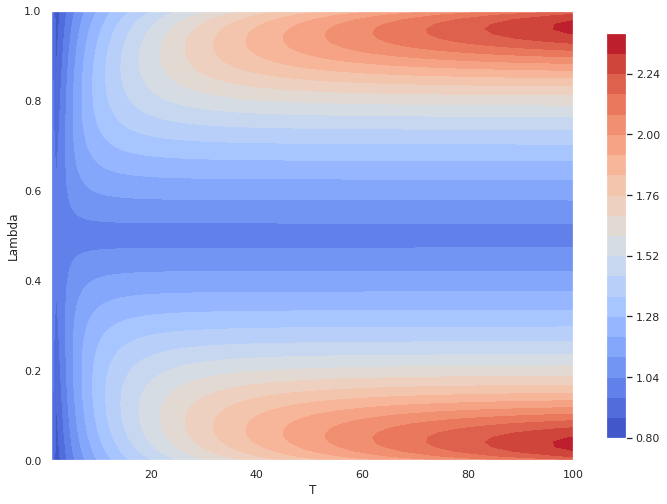

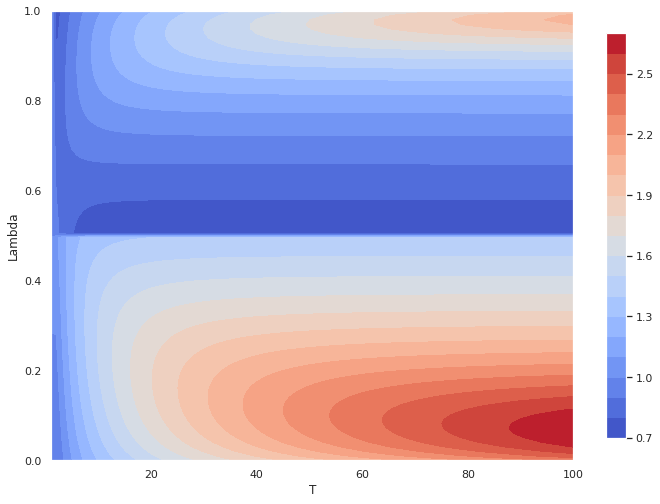

In [195]:
model = TwoRegionModel(delta=g["delta"], eps=g["eps"], phi=0.5, verbose=0)
lam, T, wr = derivative(model, Ts = np.linspace(1, 100, 100))

plt_countour(T, lam, wr, labels = ["T", "Lambda"], f=True, levels=20)

model = TwoRegionModel(delta=g["delta"], eps=g["eps"], phi=0.65, verbose=0)
lam, T, wr = derivative(model, Ts = np.linspace(1, 100, 100))

plt_countour(T, lam, wr, labels = ["T", "Lambda"], f=True, levels=20)